In [5]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt  
import numpy as np
import os,sys
caffe_root = os.environ["CAFFE_ROOT"]
os.chdir(caffe_root)                     
print caffe_root                         
sys.path.insert(0, caffe_root + 'python')
import caffe                                                                      
caffe.set_mode_gpu()                     
caffe.set_device(1)                      

dir_t = "/home/maohz12/pruning/2_results/kmeans/alexnet/"

/home/maohz12/pruning/


In [6]:
accu_top1 = numpy.load(dir_t + 'accu_top1.npz.npy')
accu_top5 = numpy.load(dir_t + 'accu_top5.npz.npy')
prototxt = '/home/maohz12/pruning/3_prototxt_solver/L2/train_val.prototxt'  
caffemodel = '/home/maohz12/pruning/4_model_checkpoint/alexnet/alexnet.caffemodel' 
net = caffe.Net(prototxt, caffemodel, caffe.TEST)

layers = filter(lambda x:'conv' in x or 'fc' in x or 'ip' in x, net.params.keys())  
layers = map(lambda x: [x], layers)                                                 
layers.append(filter(lambda x: 'conv' in x, net.params.keys()))                     
layers.append(filter(lambda x: 'fc' in x or 'ip' in x, net.params.keys()))          

bits_list = np.array([2,3,4,6,8])                                                              

['conv1']


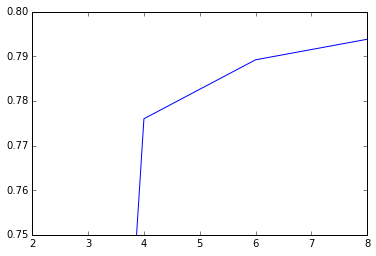

['conv2']


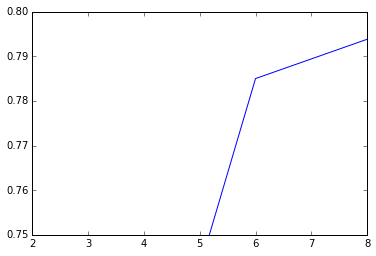

['conv3']


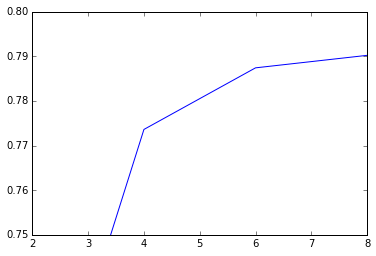

['conv4']


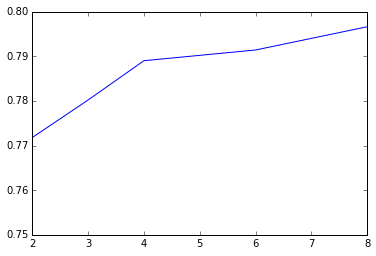

['conv5']


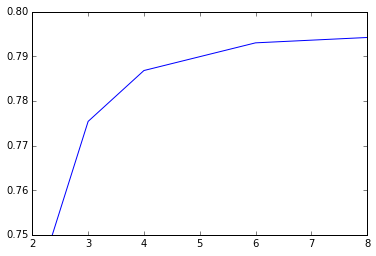

['fc6']


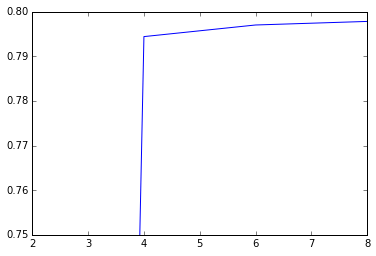

['fc7']


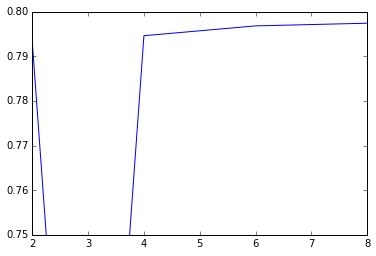

['fc8']


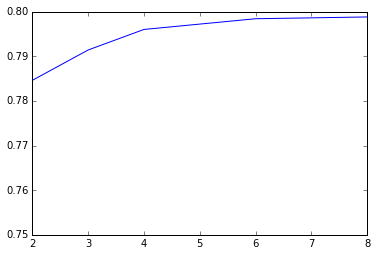

['conv1', 'conv2', 'conv3', 'conv4', 'conv5']


IndexError: index 8 is out of bounds for axis 0 with size 8

In [7]:
for i, layer in enumerate(layers):
    print layer
    plt.plot(bits_list, accu_top1[i], c='red')
    plt.plot(bits_list, accu_top5[i], c='blue')
    plt.ylim(0.75,0.8)
    plt.show()
    